- 주가 예측
- 두개 이상 기업 비교 ex) 경쟁사, 동종기업, 보완재 등등
- 실제 금융데이터 기반으로 주가 예측, 실제 값과 예측한 값이 얼마나 차이나는지 확인하기
- 투자했을 때 얻을 수 있는 수익까지 간단하게 계산해보면서 시계열 데이터 예측 진행

In [1]:
!pip install finance-datareader

In [2]:
# import necessary libraries
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
#import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io
#to predictive A
import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

In [3]:
import FinanceDataReader as fdr

In [4]:
fdr.StockListing('KRX')

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72200,2,-200,-0.28,72500,72700,71700,11694765,844353820176,431018300110000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,553000,1,3000,0.55,551000,556000,548000,173743,95782869000,129402000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,115200,2,-1000,-0.86,114600,115500,113200,2674318,307081354902,83865872448000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,744000,2,-4000,-0.53,748000,753000,741000,45085,33625021000,52953456000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,59500,2,-1000,-1.65,60400,60400,59500,1514957,90428632500,48961758650000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,004565,KR7004561007,현대비앤지스틸우,KOSPI,,19900,2,-6100,-23.46,26000,26000,18500,35443,757937600,2186054800,109852,STK
2726,288490,KR7288490006,나라소프트,KONEX,일반기업부,49,2,-1,-2.00,48,52,48,46609,2348443,1869203000,38147000,KNX
2727,322190,KR7322190000,베른,KONEX,일반기업부,141,1,10,7.63,147,147,113,178,23523,1258452777,8925197,KNX
2728,000547,KR7000542001,흥국화재2우B,KOSPI,,8050,2,-1430,-15.08,8590,8680,8050,30299,255843070,1236480000,153600,STK


- '삼성전자': '005930',
- 'SK하이닉스': '000660',
- '현대차': '005380',
- '셀트리온': '068270',
- 'LG화학': '051910',
- 'POSCO': '005490',
- '삼성물산': '028260',
- 'NAVER': '035420'

In [89]:
samsung = fdr.DataReader('005930','2022')
samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2023-06-26,71700,72500,71500,72400,10541901,0.011173
2023-06-27,72500,72600,72000,72600,9442997,0.002762
2023-06-28,72600,72700,72000,72700,8783093,0.001377


In [90]:
samsung['ds'] = pd.to_datetime(samsung.index)
samsung['y'] = samsung['Close']

In [95]:
train = samsung[:340]
test = samsung[340:]

In [96]:
prophet = Prophet(growth = 'linear', holidays_prior_scale = 10.0, changepoint_prior_scale = 0.5, daily_seasonality=True)
prophet = prophet.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoksw25z/k7_djvxy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoksw25z/54bilnoy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67479', 'data', 'file=/tmp/tmpyoksw25z/k7_djvxy.json', 'init=/tmp/tmpyoksw25z/54bilnoy.json', 'output', 'file=/tmp/tmpyoksw25z/prophet_model7qhls2yh/prophet_model-20230702053452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:34:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:34:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [97]:
future = prophet.make_future_dataframe(periods=30)
forecast = prophet.predict(future)

In [98]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-03,75614.919600,77159.710373,80000.652394,75614.919600,75614.919600,2935.319060,2935.319060,2935.319060,2800.138908,2800.138908,2800.138908,135.180152,135.180152,135.180152,0.0,0.0,0.0,78550.238660
1,2022-01-04,75461.245754,76913.926757,79903.620244,75461.245754,75461.245754,2934.295836,2934.295836,2934.295836,2800.138908,2800.138908,2800.138908,134.156928,134.156928,134.156928,0.0,0.0,0.0,78395.541590
2,2022-01-05,75307.571909,76842.614279,79616.087430,75307.571909,75307.571909,2935.672203,2935.672203,2935.672203,2800.138908,2800.138908,2800.138908,135.533295,135.533295,135.533295,0.0,0.0,0.0,78243.244112
3,2022-01-06,75153.898063,76636.271849,79533.916305,75153.898063,75153.898063,2870.977222,2870.977222,2870.977222,2800.138908,2800.138908,2800.138908,70.838314,70.838314,70.838314,0.0,0.0,0.0,78024.875285
4,2022-01-07,75000.224218,76560.825170,79458.927058,75000.224218,75000.224218,3024.464988,3024.464988,3024.464988,2800.138908,2800.138908,2800.138908,224.326080,224.326080,224.326080,0.0,0.0,0.0,78024.689206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2023-06-13,63501.332100,63184.981223,69304.495627,60525.050422,66336.674211,2934.295836,2934.295836,2934.295836,2800.138908,2800.138908,2800.138908,134.156928,134.156928,134.156928,0.0,0.0,0.0,66435.627936
366,2023-06-14,63543.164338,63078.792518,69751.260741,60383.673560,66549.690297,2935.672203,2935.672203,2935.672203,2800.138908,2800.138908,2800.138908,135.533295,135.533295,135.533295,0.0,0.0,0.0,66478.836542
367,2023-06-15,63584.996576,62957.187561,69793.592441,60284.011170,66793.367363,2870.977222,2870.977222,2870.977222,2800.138908,2800.138908,2800.138908,70.838314,70.838314,70.838314,0.0,0.0,0.0,66455.973798
368,2023-06-16,63626.828814,62425.894644,70167.902505,60105.340568,67035.890929,3024.464988,3024.464988,3024.464988,2800.138908,2800.138908,2800.138908,224.326080,224.326080,224.326080,0.0,0.0,0.0,66651.293802


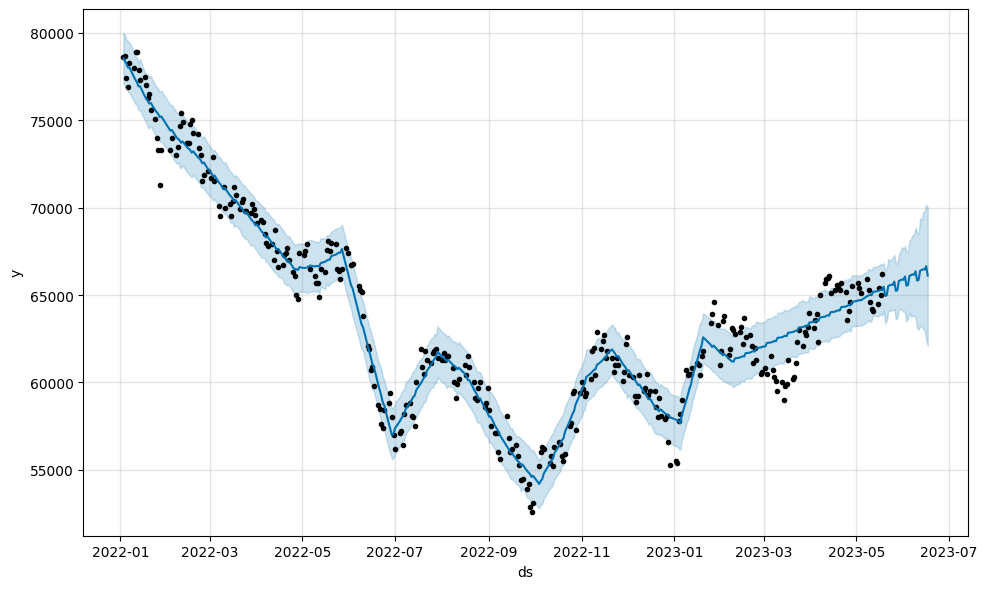

In [99]:
prophet.plot(forecast)
plt.show()

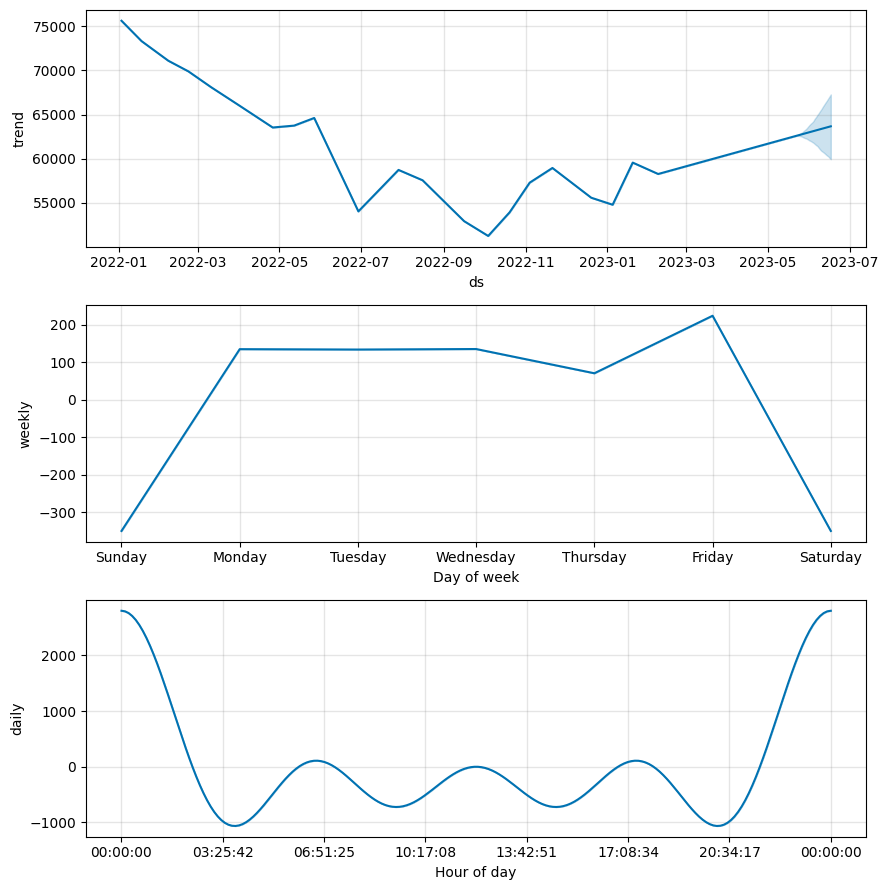

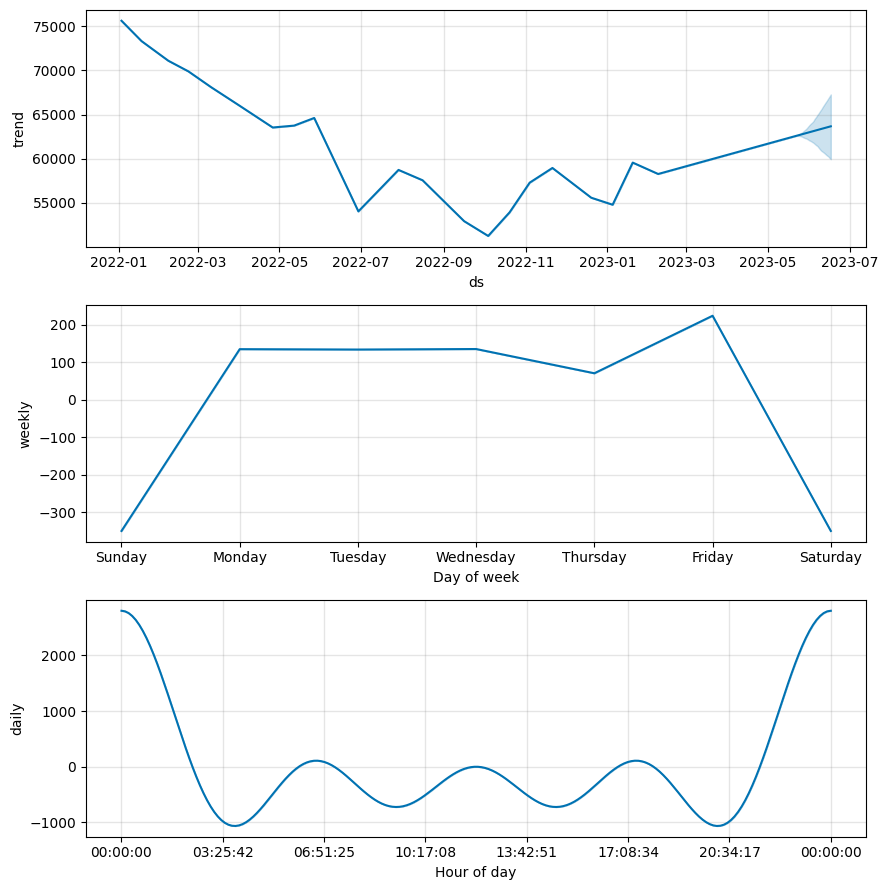

In [100]:
prophet.plot_components(forecast)

In [104]:
p_yhat = forecast[['ds','yhat']][340:]

In [105]:
print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 2022-01-03  78550.238660  77159.710373  80000.652394
1 2022-01-04  78395.541590  76913.926757  79903.620244
2 2022-01-05  78243.244112  76842.614279  79616.087430
3 2022-01-06  78024.875285  76636.271849  79533.916305
4 2022-01-07  78024.689206  76560.825170  79458.927058


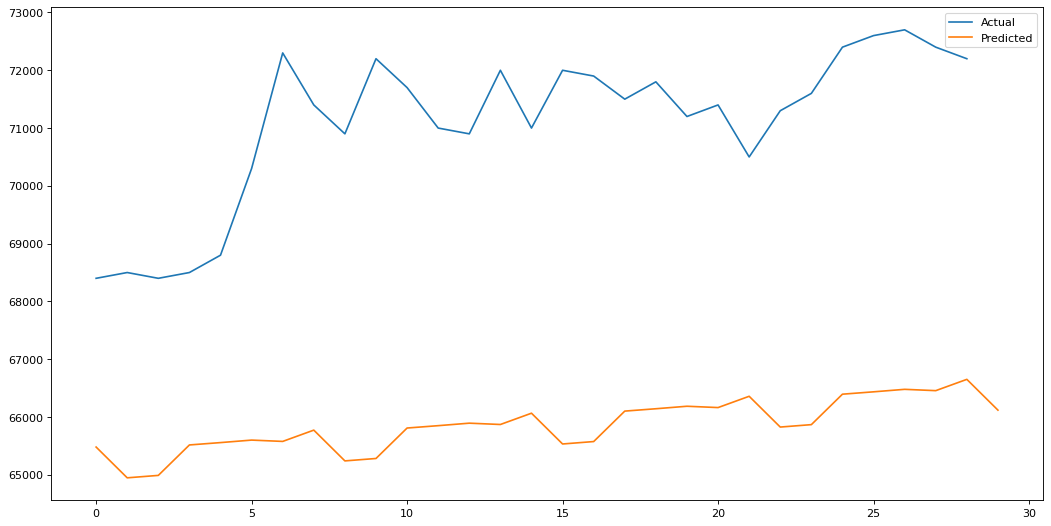

In [106]:
from matplotlib.pyplot import figure
figure(figsize=(16,8), dpi=80)

plt.plot(test['y'].values, label='Actual')
plt.plot(p_yhat['yhat'].values, label='Predicted')
plt.legend()
plt.show()

In [115]:
from sklearn.metrics import mean_squared_error
actual = test['y']
predicted = forecast['yhat'][-29:]
mae = mean_absolute_error(actual, predicted)
print("MAE:",mae)

MAE: 5225.472643429124


In [134]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(prophet, initial='340days',period='7days',horizon='30days')
df_cv.tail(14)

INFO:prophet:Making 19 forecasts with cutoffs between 2022-12-13 00:00:00 and 2023-04-18 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoksw25z/0r3j5x5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoksw25z/48aadfw2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49457', 'data', 'file=/tmp/tmpyoksw25z/0r3j5x5a.json', 'init=/tmp/tmpyoksw25z/48aadfw2.json', 'output', 'file=/tmp/tmpyoksw25z/prophet_modelh00cw3oa/prophet_model-20230702055837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:58:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:58:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoksw25z/vbo7n_a7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoksw25z/euvy82p8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
383,2023-04-27,63646.884931,61788.641329,65214.672439,64600,2023-04-18
384,2023-04-28,63832.979732,61991.919456,65486.995076,65500,2023-04-18
385,2023-05-02,63842.712330,61981.323737,65595.711159,65700,2023-04-18
386,2023-05-03,63876.890305,61701.313662,65755.278325,65400,2023-04-18
387,2023-05-04,63829.980309,61511.227740,65820.327687,65100,2023-04-18
388,2023-05-08,64020.973995,61613.354600,66235.846278,65900,2023-04-18
389,2023-05-09,64025.807708,61592.302193,66313.877481,65300,2023-04-18
390,2023-05-10,64059.985683,60928.611808,66737.971038,64600,2023-04-18
391,2023-05-11,64013.075686,60906.402601,66776.574482,64200,2023-04-18
392,2023-05-12,64199.170487,60841.824639,67269.590565,64100,2023-04-18


In [135]:
from prophet.diagnostics import performance_metrics
samsung_p = performance_metrics(df_cv)
samsung_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,7.270419e+06,2696.371485,2317.666033,0.037617,0.035939,0.037777,0.270655
1,6 days,7.452426e+06,2729.913215,2380.664245,0.038775,0.035152,0.038810,0.225371
2,7 days,7.660119e+06,2767.692045,2417.596448,0.039866,0.038684,0.039595,0.200855
3,8 days,8.355509e+06,2890.589698,2512.882539,0.041474,0.038736,0.041191,0.243590
4,9 days,9.826638e+06,3134.746838,2673.419673,0.043829,0.045600,0.043783,0.267806


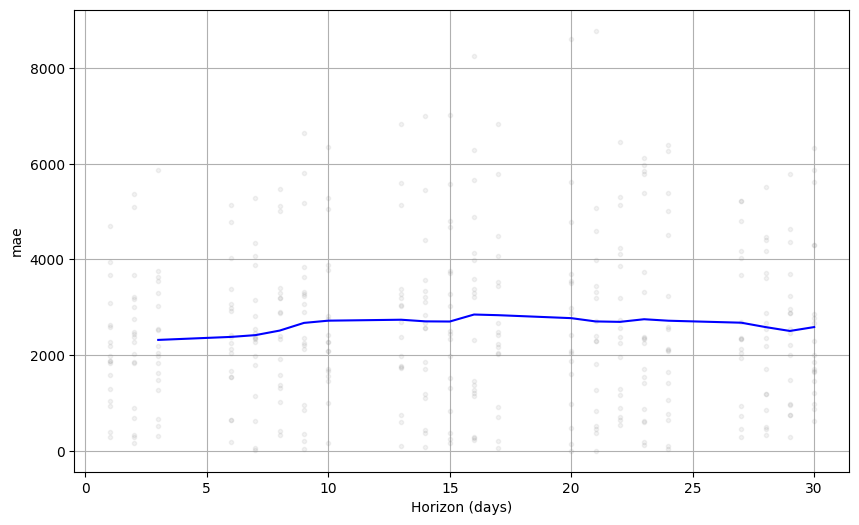

In [136]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [152]:
sk = fdr.DataReader('000660','2022')
sk

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,132000,132500,128000,128500,3782213,-0.019084
2022-01-04,129500,130000,127500,128500,3622369,0.000000
2022-01-05,129000,129000,121500,125500,7414954,-0.023346
2022-01-06,123500,127000,123000,125000,3725569,-0.003984
2022-01-07,127000,129000,126500,127000,3270119,0.016000
...,...,...,...,...,...,...
2023-06-26,113100,113900,111200,113500,3350758,-0.000880
2023-06-27,114000,114000,110800,113000,3602087,-0.004405
2023-06-28,114200,115200,112800,114300,3178571,0.011504


In [153]:
sk['ds'] = pd.to_datetime(sk.index)
sk['y'] = sk['Close']

In [154]:
train2 = sk[:340]
test2 = sk[340:]

In [155]:
prophet2 = Prophet(growth = 'linear', holidays_prior_scale = 10.0, changepoint_prior_scale = 0.5, daily_seasonality=True)
prophet2 = prophet2.fit(train2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoksw25z/n8uijkdn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoksw25z/y2sv52ob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27752', 'data', 'file=/tmp/tmpyoksw25z/n8uijkdn.json', 'init=/tmp/tmpyoksw25z/y2sv52ob.json', 'output', 'file=/tmp/tmpyoksw25z/prophet_modelhsdtz_r8/prophet_model-20230702061350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:13:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:13:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [156]:
future2 = prophet2.make_future_dataframe(periods=30)
forecast2 = prophet2.predict(future2)

In [157]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-03,122501.645000,123119.318108,130685.781324,122501.645000,122501.645000,4397.655780,4397.655780,4397.655780,4493.17092,4493.17092,4493.17092,-95.515140,-95.515140,-95.515140,0.0,0.0,0.0,126899.300780
1,2022-01-04,122280.144140,123019.118101,130770.700556,122280.144140,122280.144140,4727.706402,4727.706402,4727.706402,4493.17092,4493.17092,4493.17092,234.535482,234.535482,234.535482,0.0,0.0,0.0,127007.850542
2,2022-01-05,122058.643280,123267.624388,131071.634360,122058.643280,122058.643280,5038.079987,5038.079987,5038.079987,4493.17092,4493.17092,4493.17092,544.909067,544.909067,544.909067,0.0,0.0,0.0,127096.723267
3,2022-01-06,121837.142420,122481.497118,130227.377001,121837.142420,121837.142420,4724.941907,4724.941907,4724.941907,4493.17092,4493.17092,4493.17092,231.770987,231.770987,231.770987,0.0,0.0,0.0,126562.084327
4,2022-01-07,121615.641560,122332.170097,130246.228651,121615.641560,121615.641560,4700.763030,4700.763030,4700.763030,4493.17092,4493.17092,4493.17092,207.592110,207.592110,207.592110,0.0,0.0,0.0,126316.404590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2023-06-13,81486.211679,79478.987023,91590.730489,76361.666353,85518.843260,4727.706402,4727.706402,4727.706402,4493.17092,4493.17092,4493.17092,234.535482,234.535482,234.535482,0.0,0.0,0.0,86213.918081
366,2023-06-14,81456.748962,80066.165853,92411.392465,76053.960132,85744.136273,5038.079987,5038.079987,5038.079987,4493.17092,4493.17092,4493.17092,544.909067,544.909067,544.909067,0.0,0.0,0.0,86494.828950
367,2023-06-15,81427.286246,79037.368625,92070.153508,75788.589275,86013.061111,4724.941907,4724.941907,4724.941907,4493.17092,4493.17092,4493.17092,231.770987,231.770987,231.770987,0.0,0.0,0.0,86152.228153
368,2023-06-16,81397.823529,79282.382061,91943.638924,75418.507826,86268.796563,4700.763030,4700.763030,4700.763030,4493.17092,4493.17092,4493.17092,207.592110,207.592110,207.592110,0.0,0.0,0.0,86098.586559


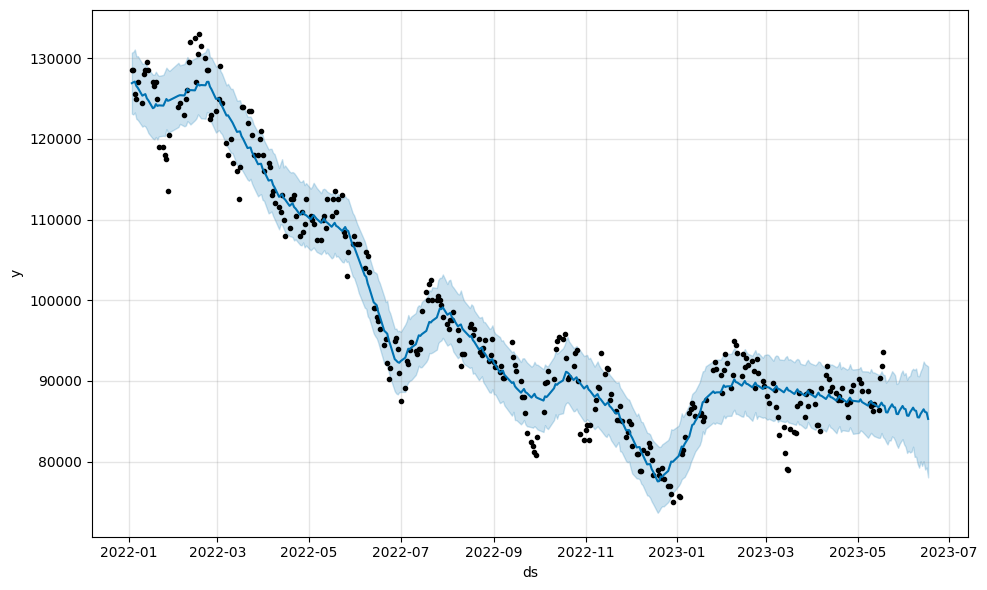

In [158]:
prophet2.plot(forecast2)
plt.show()

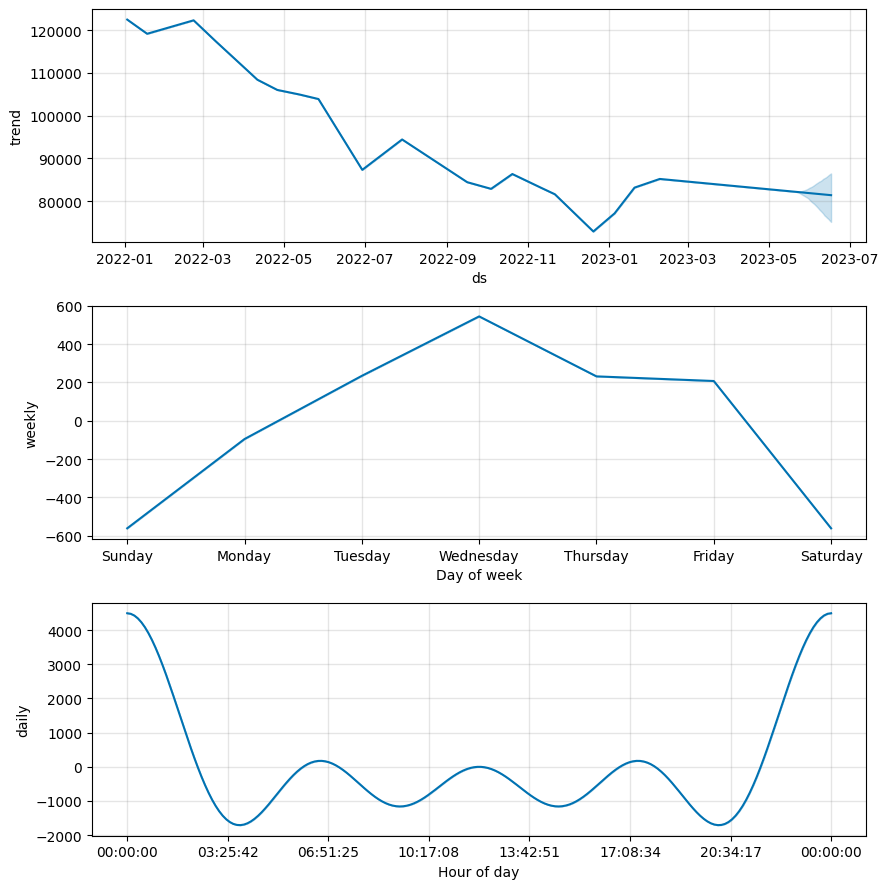

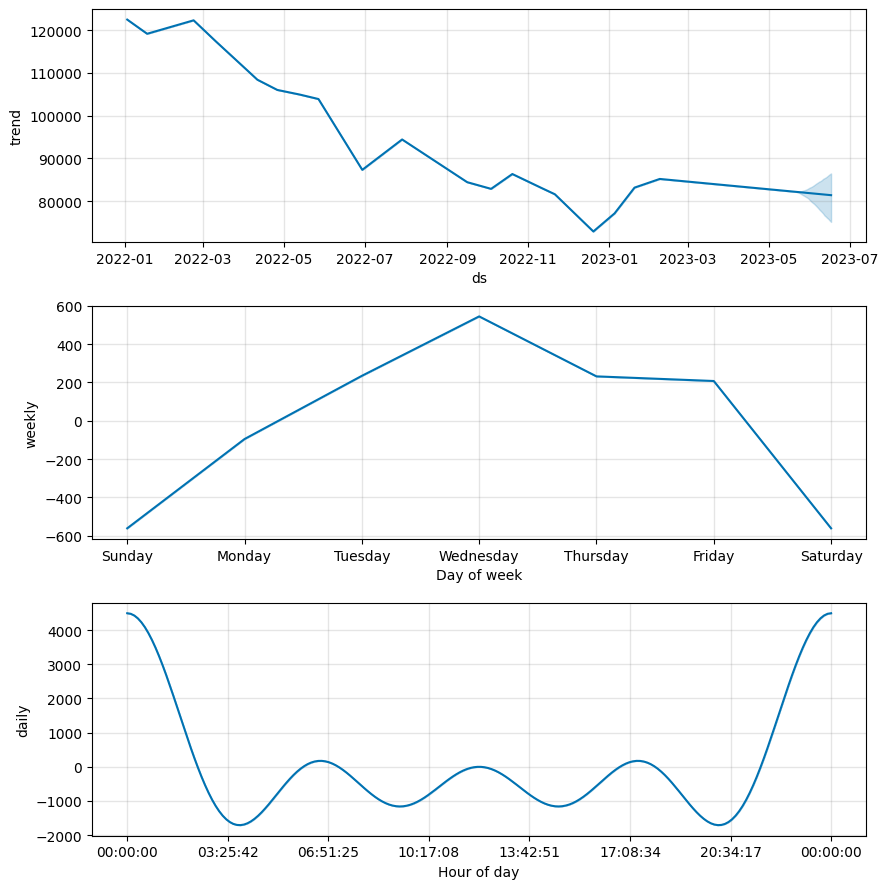

In [159]:
prophet2.plot_components(forecast2)

In [160]:
p_yhat2 = forecast2[['ds','yhat']][340:]

In [161]:
print(forecast2[['ds','yhat','yhat_lower','yhat_upper']].head())

          ds           yhat     yhat_lower     yhat_upper
0 2022-01-03  126899.300780  123119.318108  130685.781324
1 2022-01-04  127007.850542  123019.118101  130770.700556
2 2022-01-05  127096.723267  123267.624388  131071.634360
3 2022-01-06  126562.084327  122481.497118  130227.377001
4 2022-01-07  126316.404590  122332.170097  130246.228651


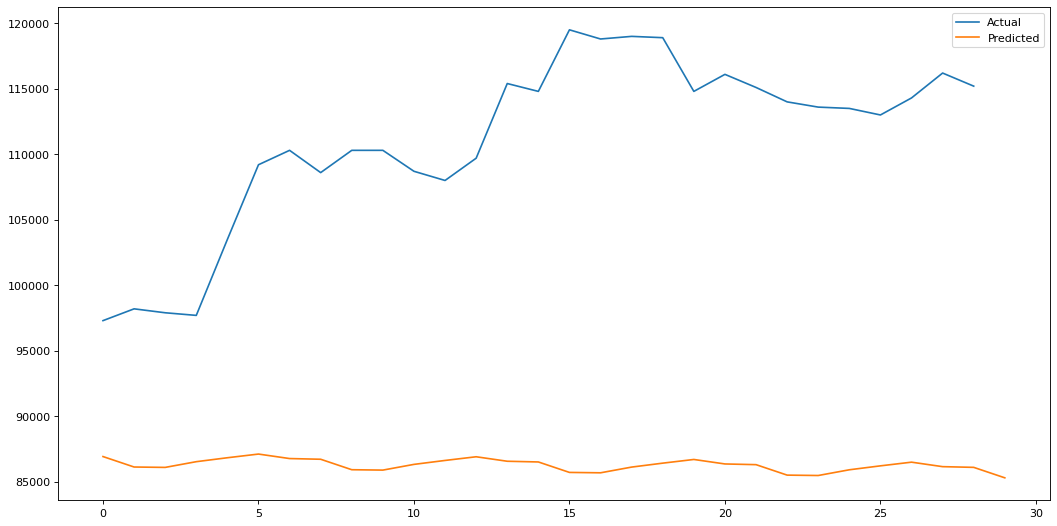

In [162]:
from matplotlib.pyplot import figure
figure(figsize=(16,8), dpi=80)

plt.plot(test2['y'].values, label='Actual')
plt.plot(p_yhat2['yhat'].values, label='Predicted')
plt.legend()
plt.show()

In [163]:
from sklearn.metrics import mean_squared_error
actual2 = test2['y']
predicted2 = forecast2['yhat'][-29:]
mae2 = mean_absolute_error(actual2, predicted2)
print("MAE2:",mae2)

MAE2: 24845.35733864666


In [164]:
from prophet.diagnostics import cross_validation
df_cv2 = cross_validation(prophet2, initial='340days',period='7days',horizon='30days')
df_cv2.tail(14)

INFO:prophet:Making 19 forecasts with cutoffs between 2022-12-13 00:00:00 and 2023-04-18 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoksw25z/4gux4zh4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoksw25z/hhy22p67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16241', 'data', 'file=/tmp/tmpyoksw25z/4gux4zh4.json', 'init=/tmp/tmpyoksw25z/hhy22p67.json', 'output', 'file=/tmp/tmpyoksw25z/prophet_model5zqueztj/prophet_model-20230702061419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:14:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:14:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoksw25z/4mugoltp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyoksw25z/9ufq4nev.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
383,2023-04-27,86866.895053,82738.599375,91093.314370,88800,2023-04-18
384,2023-04-28,86835.367339,82523.766926,91484.826549,89500,2023-04-18
385,2023-05-02,86785.244542,81880.543838,91551.468008,90200,2023-04-18
386,2023-05-03,87000.480085,81874.985821,92354.908345,89800,2023-04-18
387,2023-05-04,86696.703774,81435.965055,92037.313907,88700,2023-04-18
388,2023-05-08,86374.969964,80684.331410,91975.989227,88700,2023-04-18
389,2023-05-09,86615.053263,80722.925895,92999.500739,87300,2023-04-18
390,2023-05-10,86830.288805,79969.470505,93652.869045,86900,2023-04-18
391,2023-05-11,86526.512494,79638.676649,93737.567932,86300,2023-04-18
392,2023-05-12,86494.984780,78139.184901,94350.955408,87200,2023-04-18


In [165]:
from prophet.diagnostics import performance_metrics
sk_p = performance_metrics(df_cv2)
sk_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,4.373080e+07,6612.926928,5283.527716,0.060815,0.061040,0.061364,0.484330
1,6 days,4.087934e+07,6393.695287,5133.703021,0.059017,0.052695,0.059676,0.497976
2,7 days,4.208011e+07,6486.918420,5145.005771,0.059461,0.048121,0.059843,0.474359
3,8 days,5.441062e+07,7376.355545,5894.845497,0.068248,0.052806,0.068618,0.423077
4,9 days,6.739910e+07,8209.695701,6625.858374,0.076340,0.066741,0.077169,0.381766


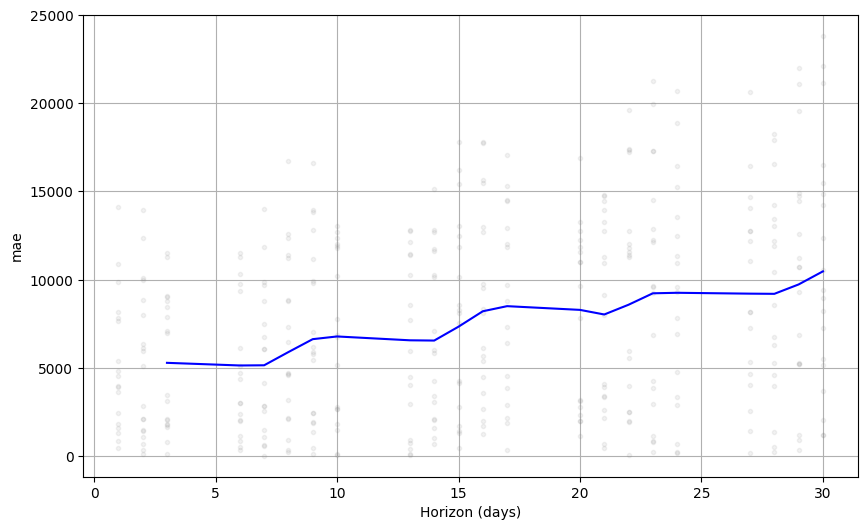

In [166]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv2, metric='mae')